# Medical Insurance Cost Prediction

## 1. Loading Libraries and Setting Up

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import itertools

## 2. Importing and Cleaning Data

In [2]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
## Checking for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Looking at statistics summary of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3. Exploratory Data Analysis (EDA)

### Exploring the categorical variables

In [6]:
# Count of unique values in categorical columns
df.select_dtypes(include=['object']).nunique()

sex       2
smoker    2
region    4
dtype: int64

In [7]:
# Count and percentage of unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {col}")
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True) * 100

    for category in counts.index:
        print(f"  {category}: {counts[category]} ({percents[category]:.2f}%)")


Column: sex
  male: 676 (50.52%)
  female: 662 (49.48%)

Column: smoker
  no: 1064 (79.52%)
  yes: 274 (20.48%)

Column: region
  southeast: 364 (27.20%)
  southwest: 325 (24.29%)
  northwest: 325 (24.29%)
  northeast: 324 (24.22%)


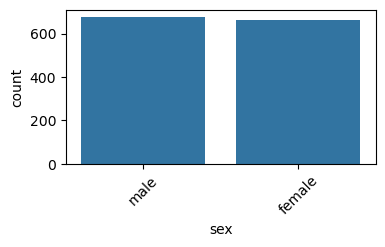

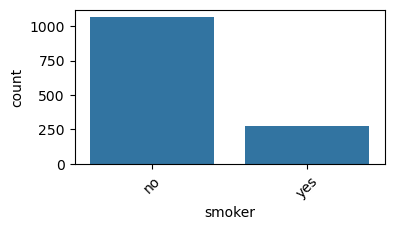

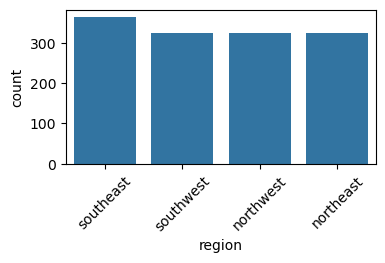

In [8]:
# Visualizing the count of categorical variables
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

The sex ratio in the dataset seems to be almost equal between the males and females.  
This dataset contains about 20% smokers, and 80% are non-smokers.  
The region seems to be almost equally distributed as well, with the southeast region(~27%) having a slight edge over the other regions (~24%)

### Exploring the numerical variables

#### Boxplots for numerical columns

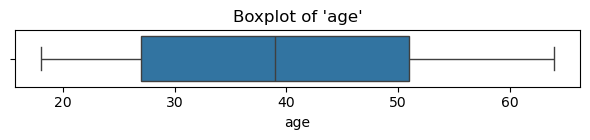

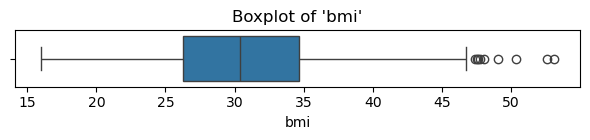

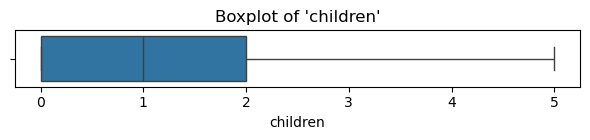

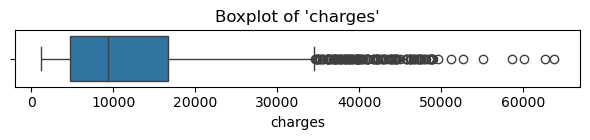

In [9]:
# Plot boxplot for each numerical column
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of '{col}'")
    plt.tight_layout()
    plt.show()

**Age:** The age distribution is fairly symmetric with no significant outliers. Most individuals fall between ages 20 and 50.

**BMI:** The BMI variable has a right-skewed distribution with a few moderate outliers above 40. This may indicate individuals with obesity.


**Children:** Most people have between 0 and 2 children. There are no extreme outliers, though higher values (3–5) are less frequent.


**Charges:** The charges column has a strong right skew, with many clear high-value outliers. These likely correspond to individuals with high medical costs, possibly due to smoking or health conditions.

#### Distribution of Age

<Axes: xlabel='age', ylabel='Count'>

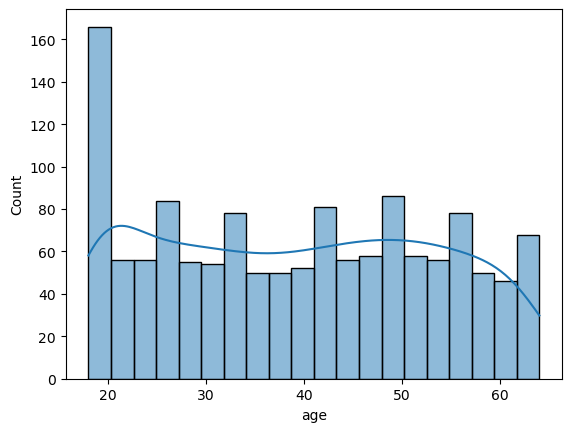

In [10]:
sns.histplot(data=df, x='age', bins=20, kde=True)

The age distribution appears to be fairly uniform across most age groups, with a slight concentration of younger individuals around age 18–20. The histogram shows that no single age group dominates the dataset, although the youngest age group (around 18–20) has a noticeably higher count than others

#### Distribution of BMI

<Axes: xlabel='bmi', ylabel='Count'>

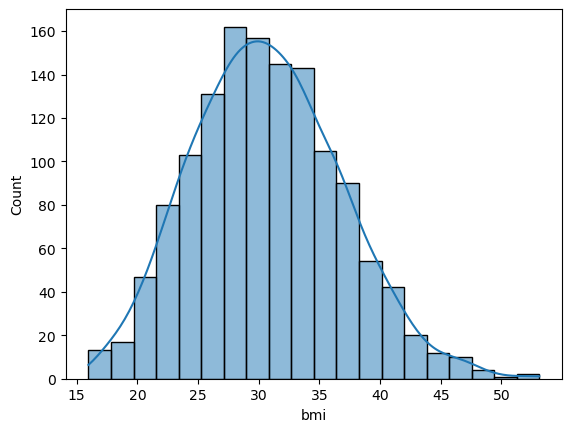

In [11]:
sns.histplot(data=df, x='bmi', bins=20, kde=True)

The BMI distribution is *approximately normal, with a slight right skew*. Most values fall between 25 and 35, indicating that a *large portion of individuals in the dataset are overweight or mildly obese* based on BMI standards.

There are a few higher BMI values (above 40), which may represent outliers or individuals with obesity-related health concerns. The peak of the distribution occurs around 30, aligning with the obesity threshold.

#### Distribution of Children

<Axes: xlabel='children', ylabel='count'>

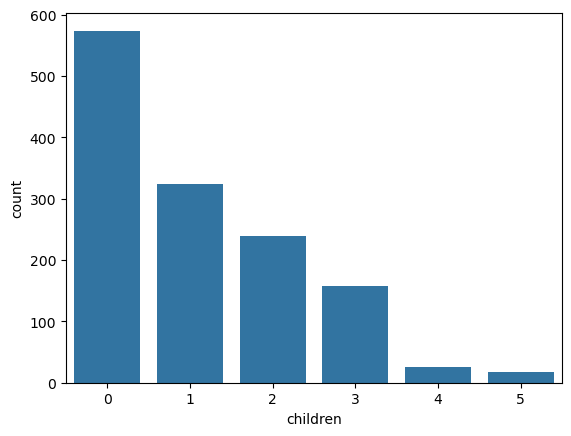

In [12]:
sns.countplot(data=df, x='children')

Although children is a numerical feature, it only takes on 6 integer values (0–5). Therefore, it visually behaves more like a categorical variable. A bar plot is more appropriate than a histogram for displaying its distribution.

#### Distribution of Charges

<Axes: xlabel='charges', ylabel='Count'>

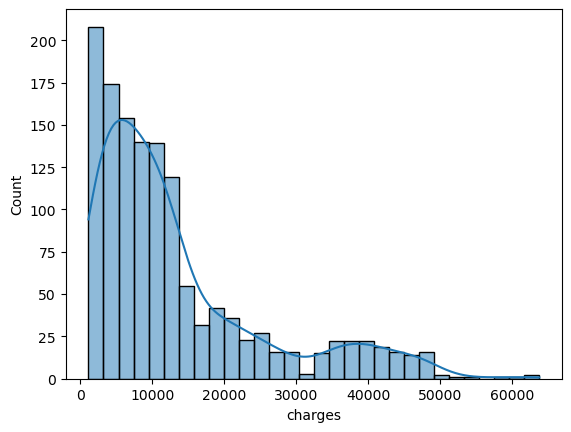

In [13]:
sns.histplot(data=df, x='charges', bins=30, kde=True)

The charges variable, which is our target for prediction, shows a strong right-skewed distribution.
Most individuals have medical expenses below $15,000, while a smaller group incurs significantly higher costs — likely due to serious health conditions or risk factors like smoking.

These high-value outliers will need to be considered carefully during modeling, and we may explore log transformation later to reduce skewness and improve model performance.
For now, we proceed with EDA on the original scale to better understand the data context.

### Target Variable (charges) v/s Other Categorical Features

#### charges v/s sex

Text(0.5, 1.0, 'Boxplots for charges based on sex')

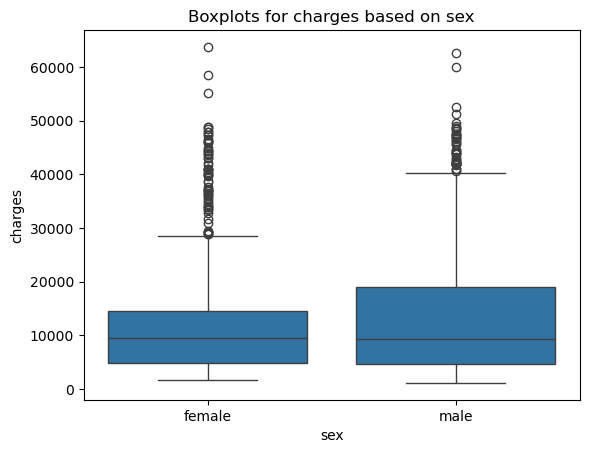

In [14]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Boxplots for charges based on sex")

Both groups show a similar distribution of charges, with nearly identical medians and interquartile ranges. While there are several high-charge outliers in both male and female groups, the overall distributions are largely overlapping, indicating that sex does not meaningfully influence billed medical charges.

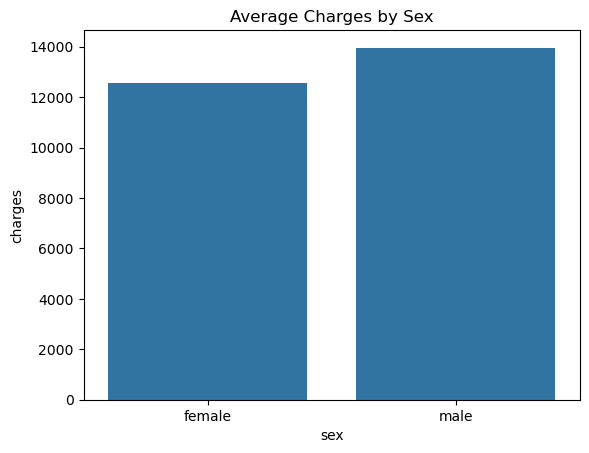

In [15]:
sex_mean_charges = df.groupby('sex')['charges'].mean().reset_index()
sns.barplot(data=sex_mean_charges, x='sex', y='charges')
plt.title('Average Charges by Sex')
plt.show()

Average charges for males and females are nearly identical, with males billed slightly more on average (~ 13, 900 vs 12,600). The difference is marginal and likely not practically significant.

#### charges v/s smoker

Text(0.5, 1.0, 'Boxplots for charges based on smoker status')

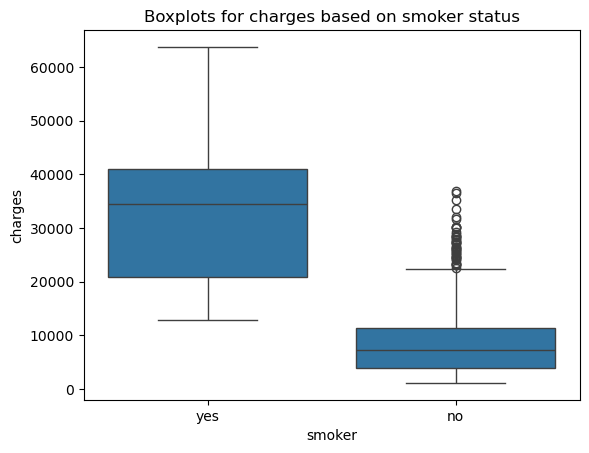

In [16]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Boxplots for charges based on smoker status")

The distribution of charges is drastically different between smokers and non-smokers. Smokers have a median charge of over **35,000**, while _non-smokers are centered around 7,000_. The interquartile range for smokers is much wider, and several individuals are billed in excess of $60,000. This clearly indicates that smoking is strongly associated with significantly higher medical charges.

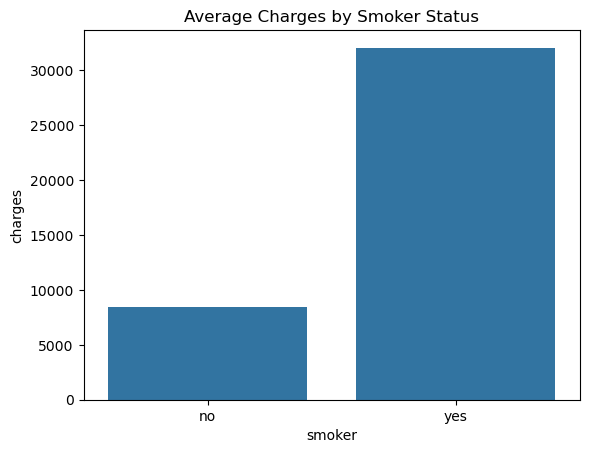

In [17]:
smoker_mean_charges = df.groupby('smoker')['charges'].mean().reset_index()
sns.barplot(data=smoker_mean_charges, x='smoker', y='charges')
plt.title('Average Charges by Smoker Status')
plt.show()

The average medical charge for smokers is approximately 32,000, compared to just 8,000 for non-smokers — a fourfold difference. This reinforces the observation from the boxplot and highlights smoking as the most influential categorical variable affecting charges.


#### charges v/s region

Text(0.5, 1.0, 'Boxplots for charges based on region')

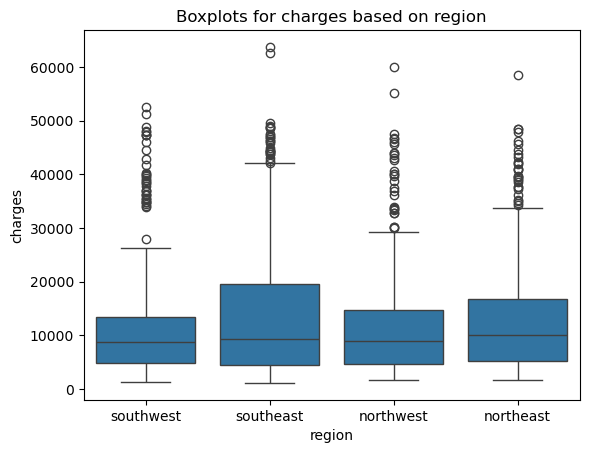

In [18]:
sns.boxplot(x='region', y='charges', data=df)
plt.title("Boxplots for charges based on region")

Distributions across all four regions are highly similar, with overlapping medians, interquartile ranges, and comparable presence of high-charge outliers. There is no visible shift in distribution that suggests region has a substantial impact on medical charges.

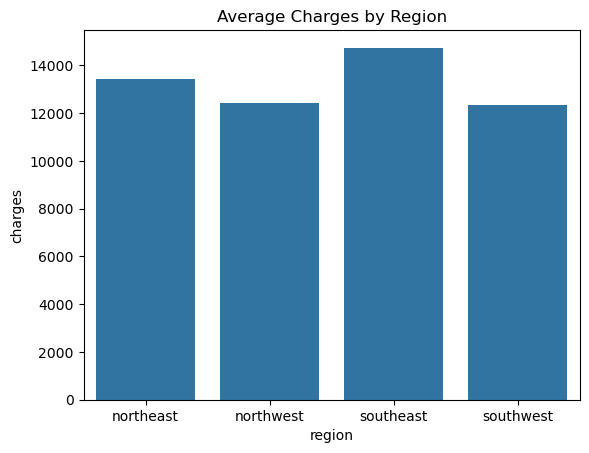

In [19]:
region_mean_charges = df.groupby('region')['charges'].mean().reset_index()
sns.barplot(data=region_mean_charges, x='region', y='charges')
plt.title('Average Charges by Region')
plt.show()

Average charges are relatively consistent across regions, ranging from ~ 12, 300inthesouthwestto
14,800 in the southeast. The difference is modest and likely not of practical importance. Region does not appear to be a key factor in explaining variation in charges.

#### charges v/s children

Although `children` is a numerical column, it takes on only six discrete values ranging from 0 to 5, each representing the number of dependents covered under the individual’s insurance plan. Since the values are count-based and ordinal without a continuous scale, it is more intuitive and meaningful to treat `children` as a categorical variable during exploratory analysis.

Text(0.5, 1.0, 'Boxplots for charges based on number of children')

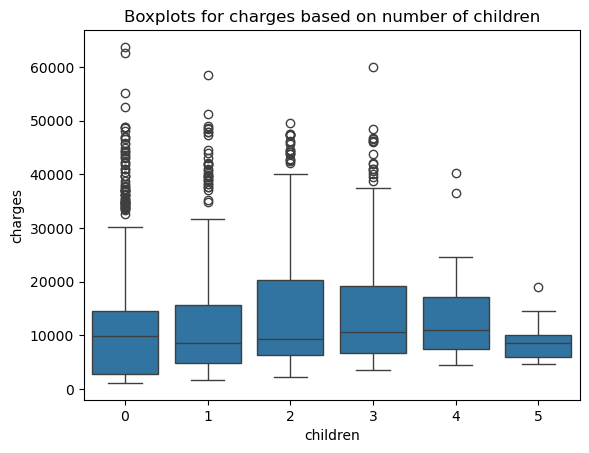

In [20]:
sns.boxplot(x='children', y='charges', data=df)
plt.title("Boxplots for charges based on number of children")

Across all child count groups (0–5), the spread and median of charges remain broadly similar. While individuals with 2 or 3 children appear to have slightly higher medians, the differences are not substantial. Notably, fewer high-charge outliers are observed in the 4 and 5 children groups, likely due to much smaller sample sizes, as shown in the countplot.

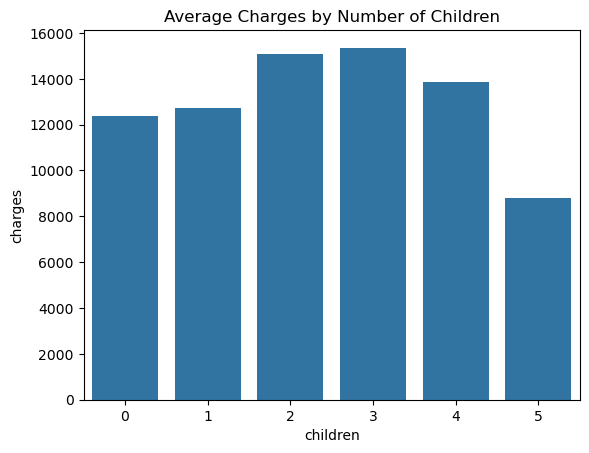

In [21]:
children_mean_charges = df.groupby('children')['charges'].mean().reset_index()
sns.barplot(data=children_mean_charges, x='children', y='charges')
plt.title('Average Charges by Number of Children')
plt.show()

Average charges peak for those with 2 and 3 children, reaching over $15,000, while individuals with 0 or 5 children have the lowest averages. However, the dip at 5 children may not be reliable given the very low number of samples in that group. Overall, the number of children shows only a mild relationship with charges, and patterns may be influenced by confounding factors like smoking or age.

### Interaction Effects between Features

#### Boxplots for Charges Across Categorical Feature Combinations
To investigate whether combinations of categorical features have a joint influence on medical charges, we plotted pairwise interaction boxplots. This helps identify whether the relationship between one categorical variable and charges changes depending on the level of another variable.


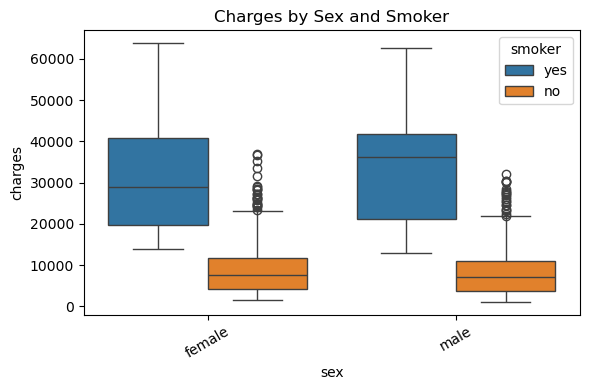

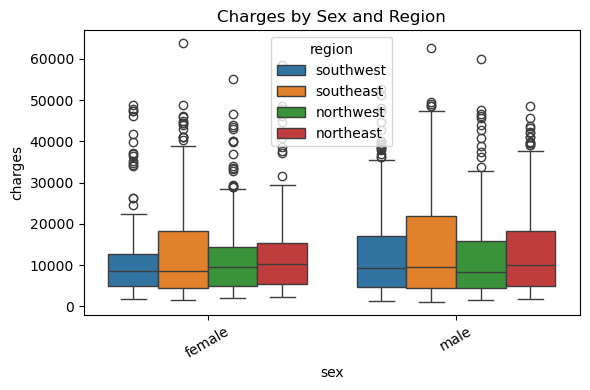

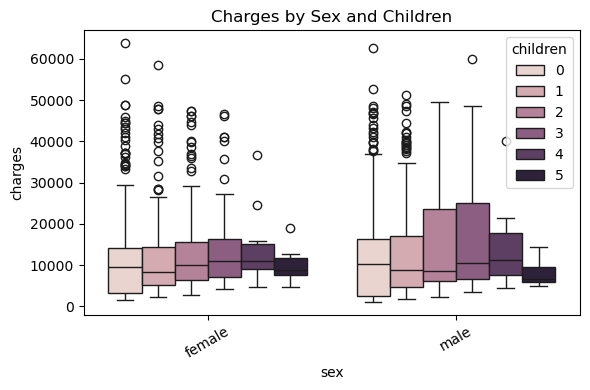

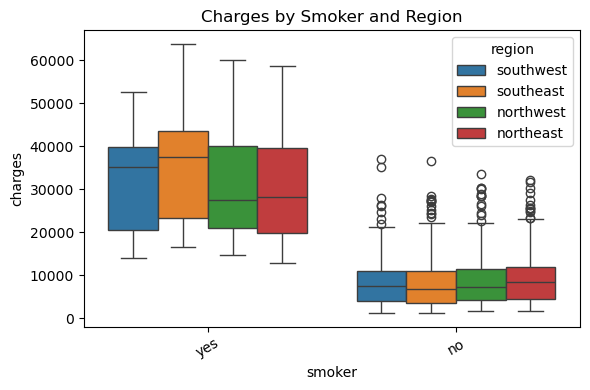

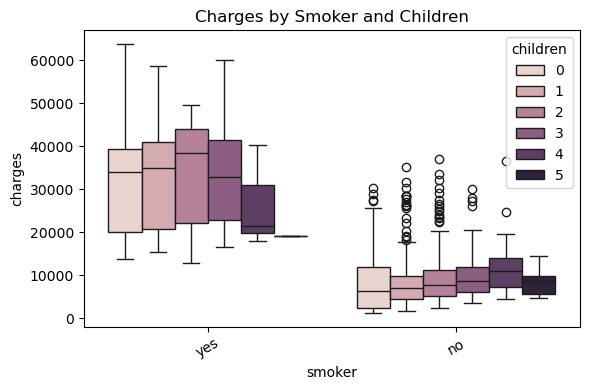

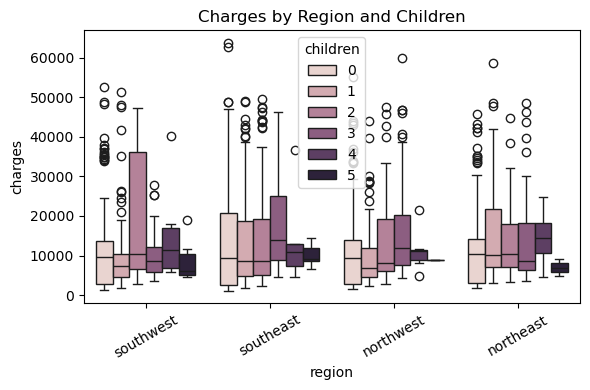

In [22]:
categorical_features = ['sex', 'smoker', 'region', 'children']
# All 2-way combinations
interactions = list(itertools.combinations(categorical_features, 2))
for x, hue in interactions:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=x, y='charges', hue=hue)
    plt.title(f"Charges by {x.title()} and {hue.title()}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Across all categorical feature combinations, interaction effects involving the `smoker` variable are by far the most significant.

- **Sex × Smoker**: There is a clear, dramatic jump in charges for both male and female smokers compared to their non-smoking counterparts. However, within smokers and non-smokers, the difference between males and females is negligible. This suggests that **smoking is the primary driver**, and gender has minimal interaction effect.

- **Smoker × Region**: A consistent and large gap is visible between smokers and non-smokers across all regions. The medians for smokers are uniformly much higher, but regional variation within each smoker category is small, indicating that **region does not significantly modify the effect of smoking**.

- **Smoker × Children**: Smokers consistently have higher charges than non-smokers across all child counts, and the spread tends to increase with more children for smokers. This may suggest a mild interaction — **smoking combined with dependents might lead to higher medical expenses** — but it's not very strong.

- **Sex × Region**: Minimal difference is observed across sexes and regions. Distributions overlap heavily, medians are aligned, and no notable interaction pattern exists here.

- **Sex × Children**: Slight variations are seen (e.g., males with 2–3 children show a slightly higher median), but **overall, the pattern is inconsistent**, and there's no strong interaction between gender and number of dependents.

- **Region × Children**: Distributions across children counts are similar within each region, and there’s no major shift in spread or central tendency across the subgroups. This plot further supports that **region has little to no effect** on medical charges, even when combined with children.

In summary, **smoking status is the only categorical variable whose interactions with other features consistently produce significant changes in medical charges.** All other variables show weak or no interaction effects.

#### Target Variable (charges) v/s Other Numerical Features
To examine how continuous variables relate to medical charges, we now explore the numerical features in the dataset: `age` and `bmi`. These features are plotted against `charges` using scatterplots, which help reveal trends, patterns, and outliers.

To gain deeper insights, we use color hues to segment data based on key categorical features: `smoker`, `sex`, and `region`. This allows us to investigate whether the relationship between numerical features and charges differs across these subgroups, helping us uncover possible interaction effects or conditional trends.

Note: While `children` is also a numerical variable, it was treated as categorical in the previous section due to its discrete nature.

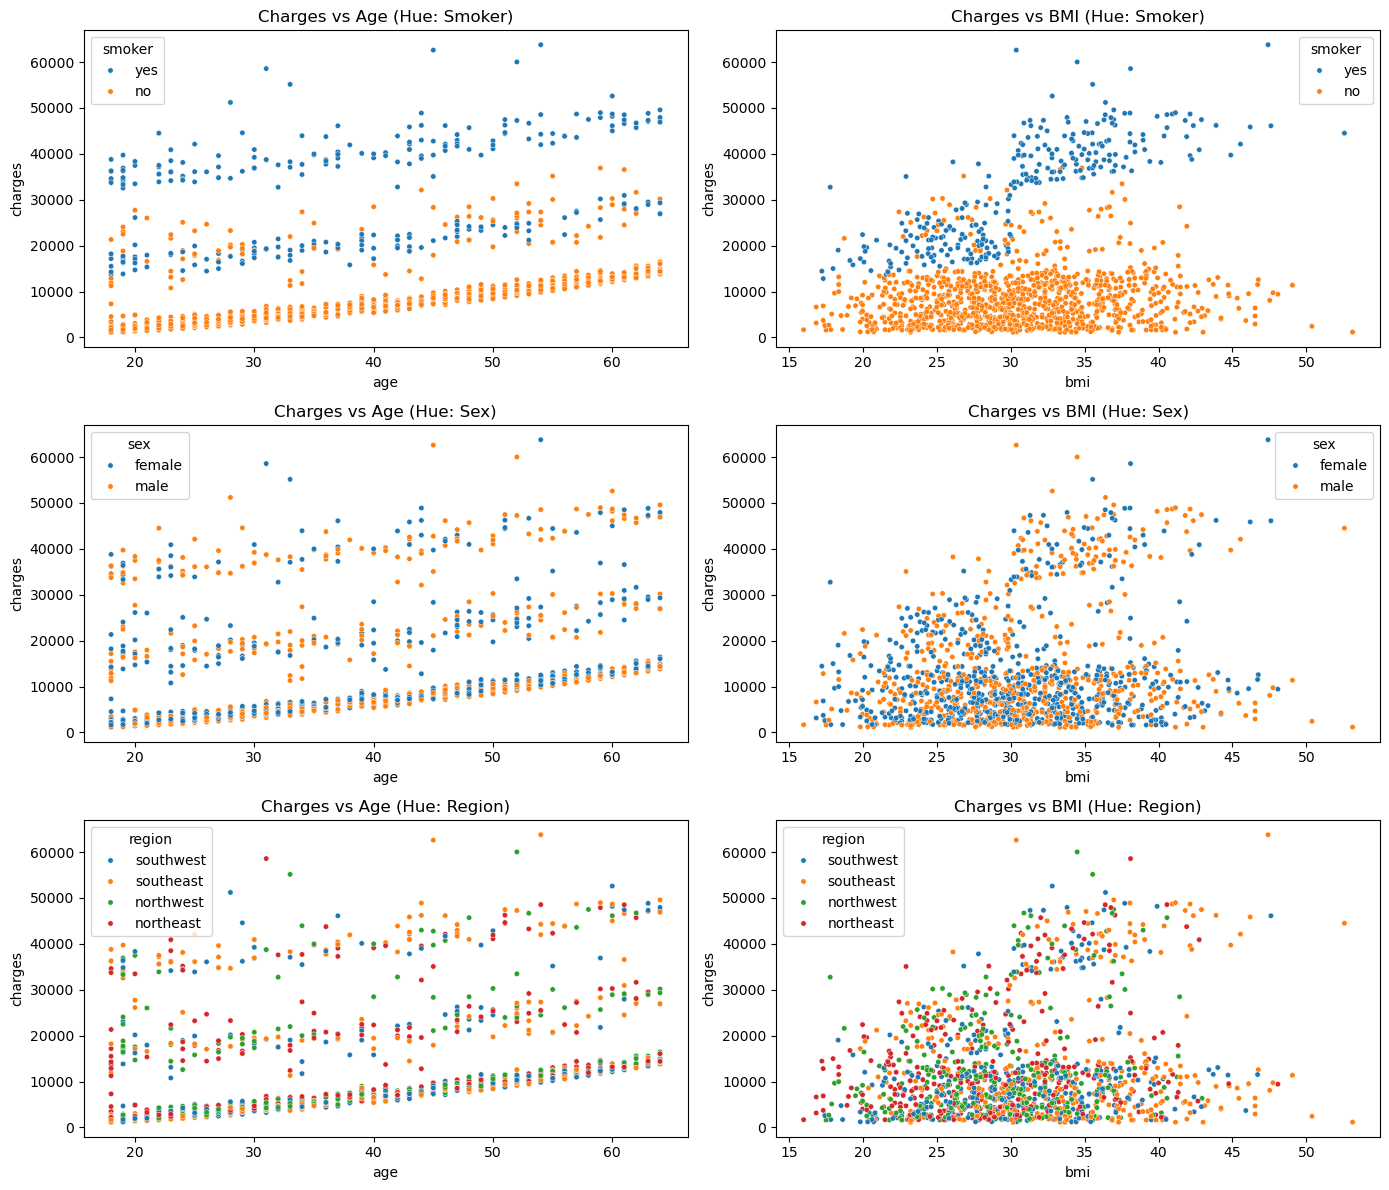

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
hues = ['smoker', 'sex', 'region']
titles = ['Smoker', 'Sex', 'Region']
for i, hue in enumerate(hues):
    # Scatterplot: Charges vs Age
    sns.scatterplot(data=df, x='age', y='charges', hue=hue, ax=axes[i, 0], s=15)
    axes[i, 0].set_title(f'Charges vs Age (Hue: {titles[i]})')
    # Scatterplot: Charges vs BMI
    sns.scatterplot(data=df, x='bmi', y='charges', hue=hue, ax=axes[i, 1], s=15)
    axes[i, 1].set_title(f'Charges vs BMI (Hue: {titles[i]})')
plt.tight_layout()
plt.show()

- **Charges vs Age (Hue: Smoker)**  
There is a clear upward trend in charges with age for both smokers and non-smokers. However, smokers are billed significantly more at all age levels, and the separation becomes even more dramatic after age 30. This consistent vertical gap suggests that age and smoking act as **additive risk factors**, leading to very high charges for older smokers.

- **Charges vs BMI (Hue: Smoker)**  
For non-smokers, charges remain relatively stable across BMI values, indicating little correlation. In contrast, smokers show a notable increase in charges with higher BMI, especially beyond a BMI of 30. This indicates a possible **interaction effect** between smoking and BMI — elevated BMI amplifies costs only for smokers.

- **Charges vs Age (Hue: Sex)**  
Both male and female beneficiaries follow a similar trend: increasing charges with age. The distributions between the two genders are nearly identical, with no visible separation. This implies that **sex does not influence how age impacts charges** — there is no interaction effect here.

- **Charges vs BMI (Hue: Sex)**  
Charges for both males and females increase slightly with BMI, but again, the patterns are nearly overlapping. There is no meaningful distinction between the genders in how BMI affects charges, confirming that **sex alone is not a significant differentiator in BMI-related billing**.

- **Charges vs Age (Hue: Region)**  
While the overall upward trend with age remains consistent, regional differences are minimal. All regions exhibit similar charge distributions across the age range, with no distinct region showing a higher or lower slope. This supports earlier findings that **region has limited influence on charges**, even in combination with numerical features.

- **Charges vs BMI (Hue: Region)**  
Across regions, charges remain mostly flat for non-obese individuals and rise for those with very high BMI — but this rise is not region-specific. The clusters overlap heavily, indicating that **BMI-related cost increases are independent of region**.



Overall, **smoking status is the only categorical feature that meaningfully interacts with `age` and `bmi`** in influencing charges. Age is a strong predictor of higher charges across the board, but its effect is intensified among smokers. BMI, while not strongly correlated with charges in general, becomes a risk factor when combined with smoking. Sex and region, on the other hand, show no notable interaction effects and can be considered less impactful in this numerical context.

#### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

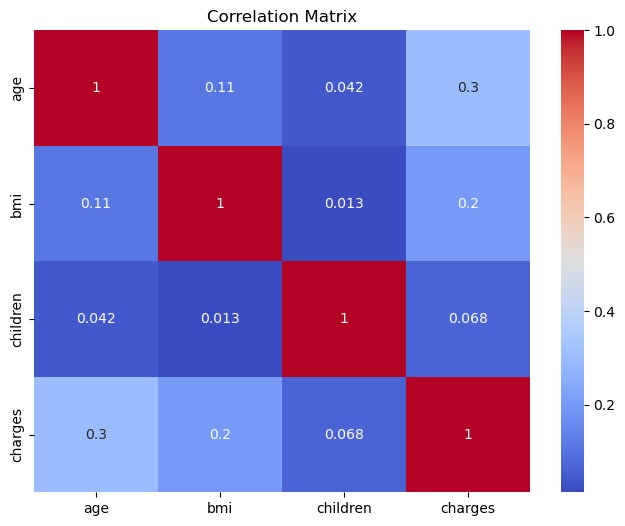

In [24]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

**Correlation Insights:**

The correlation matrix reveals that none of the numerical features are strongly correlated with the insurance charges. However, moderate positive correlations exist:
- **Age and Charges (0.30):** Older individuals tend to have higher medical costs, potentially due to age-related health conditions.
- **BMI and Charges (0.20):** Individuals with higher BMI might be incurring greater medical expenses.
- **Children and Charges (0.068):** The number of children shows negligible correlation with charges.

These insights suggest that while numerical features contribute to cost variability, other categorical or interaction-based factors might play a more significant role.

#### Skewness Analysis of `charges` for Transformation Decisions

Original Charges Skewness: 1.5141797118745743


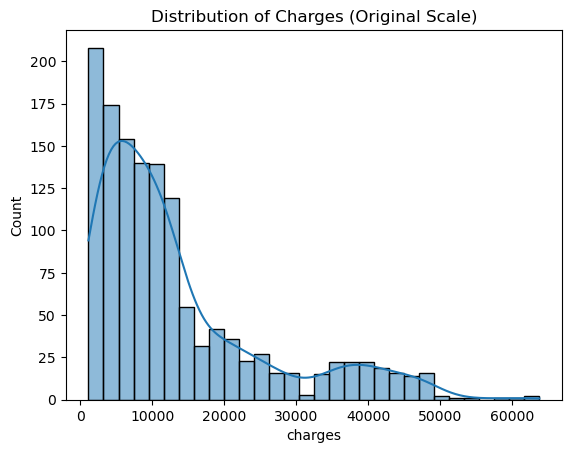

Log Charges Skewness: -0.08999648706579091


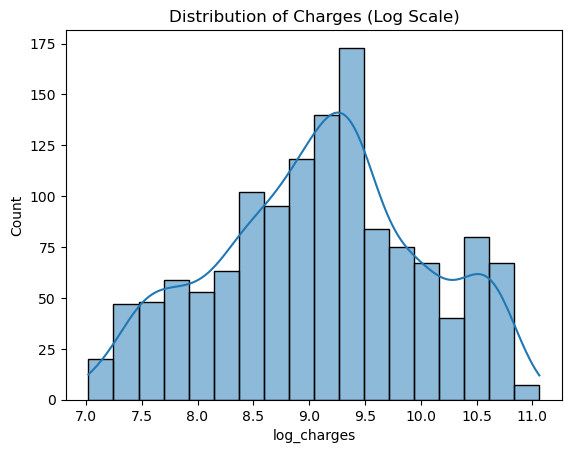

In [25]:
print("Original Charges Skewness:", skew(df['charges']))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges (Original Scale)")
plt.show()

# log-transformed
df['log_charges'] = np.log(df['charges'])
print("Log Charges Skewness:", skew(df['log_charges']))
sns.histplot(df['log_charges'], kde=True)
plt.title("Distribution of Charges (Log Scale)")
plt.show()

The distribution of medical charges is highly right-skewed, with a long tail of high-cost individuals. Applying a logarithmic transformation yields a more symmetric distribution that approximates normality. This transformation is beneficial for models like linear regression that assume normally distributed residuals. Tree-based models, on the other hand, are less sensitive to skewed target distributions and may not require such transformation.